<a href="https://colab.research.google.com/github/benedi91/data_science/blob/master/koronascience_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Coronascience project

Author: Tomasz Benedysiuk


annotation: This project is own project. I is not based on any other projects. Only part of the functions in part 3 was created on the basis of the tutorial available here:
https://www.youtube.com/watch?v=EvnpoUTXA0E, the data download has been partially copied from the koronascience classes.

In [0]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import math

#1. Data ingestion, cleaning data and processing



In [0]:
# import dataset
url = f"https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
dfC = pd.read_csv(url, encoding='ISO-8859-1', error_bad_lines=False)


In [0]:
#sorting table from dataset
dfC['countriesAndTerritories'] = dfC['countriesAndTerritories'].str.lower()
dfC['countriesAndTerritories'] = dfC['countriesAndTerritories'].str.capitalize()
dfCwiersze = dfC.sort_values(["year","month","day"]).reset_index()
dfC = dfC.sort_values(['countriesAndTerritories',"year","month","day"]).reset_index()



In [0]:
#create a daily infection table (day by day) for each country
#creating new empty table
frame = pd.DataFrame([["x"]], columns=['Country'])
# create column "Country" with country names
c = 0
for k in range(len(dfC.index.values)):
  if dfC.loc[k , "countriesAndTerritories"] in frame.loc[ : , "Country" ].tolist():
    pass
  else: 
    frame.loc[ c , "Country" ] = dfC.loc[k , "countriesAndTerritories"]
    c += 1
# adding columns with date
for k in range(len(dfC.index.values)):
  if dfCwiersze.loc[k , "dateRep"] in list(frame.columns):
    pass
  else: 
    frame.loc[ 0 , dfCwiersze.loc[k , "dateRep"] ] = 0
#adding values to table
ci = 0
fC = "Afghanistan"
for k in range(len(dfC.index.values)):
  if dfC.loc[k , "countriesAndTerritories"] != fC:
    fC = dfC.loc[k , "countriesAndTerritories"]
    ci +=1
  frame.loc[ ci , dfC.loc[k , "dateRep"] ] = dfC.loc[k , "cases"]
frame=frame.fillna(0)

In [0]:
frame

,Country,31/12/2019,01/01/2020,02/01/2020,03/01/2020,04/01/2020,05/01/2020,06/01/2020,07/01/2020,08/01/2020,09/01/2020,10/01/2020,11/01/2020,12/01/2020,13/01/2020,14/01/2020,15/01/2020,16/01/2020,17/01/2020,18/01/2020,19/01/2020,20/01/2020,21/01/2020,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,...,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,25/03/2020,26/03/2020,27/03/2020,28/03/2020
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,6.0,5.0,1.0,0.0,0.0,2.0,0.0,10.0,6.0,2.0,33.0,0.0,16.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,1.0,12.0,10.0,5.0,4.0,9.0,4.0,4.0,11.0,0.0,6.0,13.0,11.0,23.0,23.0,28.0,12.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,7.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,2.0,11.0,11.0,12.0,0.0,13.0,9.0,12.0,0.0,8.0,87.0,42.0,33.0,41.0,0.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,0.0,39.0,22.0,0.0,13.0,25.0,20.0,31.0,24.0,36.0,43.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,8.0,7.0,0.0,10.0,0.0,13.0,3.0,6.0,10.0,18.0,21.0
192,Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0,48.0,7.0,15.0,1.0,12.0
193,Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,9.0,1.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,0.0,15.0,9.0,2.0,7.0,24.0,5.0,11.0,14.0,5.0,16.0
194,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
#create table with sum of 
framex = frame
for i in range(len(framex.index.values)):
  for j in range(len(framex.columns.values)):
    if j == 0 or j == 1:
      pass
    else: framex.loc[ i , framex.columns[j]] = framex.loc[ i , framex.columns[j]] + framex.loc[ i , framex.columns[j-1]]

In [0]:
framex

,Country,31/12/2019,01/01/2020,02/01/2020,03/01/2020,04/01/2020,05/01/2020,06/01/2020,07/01/2020,08/01/2020,09/01/2020,10/01/2020,11/01/2020,12/01/2020,13/01/2020,14/01/2020,15/01/2020,16/01/2020,17/01/2020,18/01/2020,19/01/2020,20/01/2020,21/01/2020,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,...,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,25/03/2020,26/03/2020,27/03/2020,28/03/2020
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,7.0,7.0,7.0,7.0,10.0,16.0,21.0,22.0,22.0,22.0,24.0,24.0,34.0,40.0,42.0,75.0,75.0,91.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,10.0,11.0,23.0,33.0,38.0,42.0,51.0,55.0,59.0,70.0,70.0,76.0,89.0,100.0,123.0,146.0,174.0,186.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,12.0,17.0,17.0,17.0,20.0,20.0,20.0,20.0,24.0,26.0,37.0,48.0,60.0,60.0,73.0,82.0,94.0,94.0,102.0,189.0,231.0,264.0,305.0,305.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,14.0,14.0,53.0,75.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0,267.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,16.0,23.0,23.0,33.0,33.0,46.0,49.0,55.0,65.0,83.0,104.0
192,Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,33.0,33.0,33.0,33.0,36.0,36.0,36.0,84.0,91.0,106.0,107.0,119.0
193,Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,7.0,8.0,9.0,10.0,10.0,12.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,21.0,30.0,31.0,35.0,39.0,44.0,49.0,53.0,57.0,61.0,61.0,76.0,85.0,87.0,94.0,118.0,123

#2. Chart comparing two countries from  day with given number of cases in a country

In [0]:
# chart comparing two countries from  day with given number of cases in a country
def comparison_plot(country,country2,count_from):
  loca = framex[framex["Country"]==country].index.values[0]
  loca2 = framex[framex["Country"]==country2].index.values[0]
  lowest = sum(i > count_from for i in framex.loc[loca,:][1:])
  lowest2 = sum(i > count_from for i in framex.loc[loca2,:][1:])
  lowest_range = lowest2-lowest
  if lowest_range > 0:
    maxY = int(math.ceil(max(max(framex.loc[loca,:][1:]),max(framex.loc[loca2,:][-lowest2:-lowest_range]))/100.0)) * 100
  else:
    maxY = int(math.ceil(max(framex.loc[loca,:][1:])/100.0)) * 100
  plt.autoscale(axis ="y")
  maxX = framex.loc[loca,:][-lowest:].count()
  plt.plot(list(range(0,lowest)),framex.loc[loca,:][-lowest:],color='red', label=framex.loc[loca,"Country"])
  plt.plot(list(range(0,lowest2)),framex.loc[loca2,:][-lowest2:],color='blue', label=framex.loc[loca2,"Country"])
  plt.title(framex.loc[loca,"Country"] + " cases according to " + framex.loc[loca2,"Country"])
  plt.xlabel("days from the detection of the number " +str(count_from) +"case")
  plt.ylabel("total cases")
  plt.legend()
  plt.xlim(1,maxX)
  plt.ylim(0,maxY)
  plt.style.use('fast')
  return(plt.show())


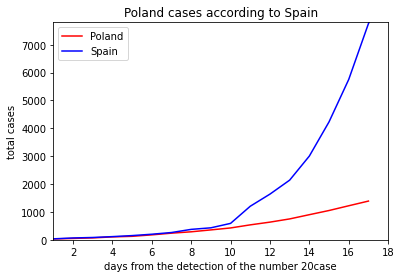

In [0]:
comparison_plot("Poland", "Spain",20)


#3. Predictive model that predicts the total number of infections in a selected country for any number of days ahead



In [0]:
# creating a prediction for a given country, prediction calculated from a day with given number of cases in the country
class regression():
  def __init__(self,country,count_from):
    self.count = count_from
    self.loca = framex[framex["Country"]==country].index.values[0]
    self.lowest = sum(i > count_from for i in framex.loc[self.loca,:][1:])

    x = np.array(range(0,self.lowest))
    x = x.reshape(-1, 1)
    self.x_new = np.hstack([x,x**2,x**3,x**4])
    y = np.array((framex.loc[self.loca,:][-self.lowest:]))
    mod = LinearRegression()
    self.model = mod.fit(self.x_new,y)
    self.y_pred = self.model.predict(self.x_new)
  
  #regression fit data chart
  def plot(self):
    plt.scatter(list(range(0,self.lowest)),framex.loc[self.loca,:][-self.lowest:])
    plt.plot(self.x_new[:,0],self.y_pred,'r')
    plt.xlabel("days from the detection of the number " +str(self.count) +" case")
    plt.ylabel("total cases")
    plt.title(framex.loc[self.loca,"Country"] + " cases according to calculated regression line.")
    print(plt.show())

  #prediction of the number of cases for the following days (1 - tomorrow, 2 - the day after tomorrow, etc.) 
  def prediction(self,days):
    arg = max(range(0,self.lowest))+days
    y = arg*self.model.coef_[0] + self.model.coef_[1]*arg**2 + self.model.coef_[2]*arg**3 + self.model.coef_[3]*arg**4 + self.model.intercept_
    pred = round(y)
    return(pred)
 

In [0]:
polska = regression("Poland",10)

In [0]:
włochy = regression("Italy",10)

In [0]:
hiszpania = regression("Spain",10)

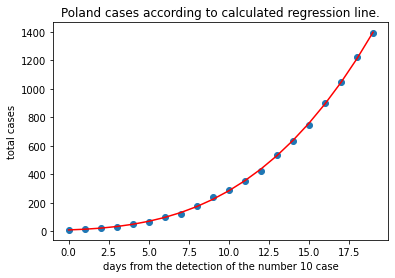

None


In [0]:
polska.plot()

In [0]:
polska.prediction(4)

2327.0

In [0]:
polska.prediction(5)

2612.0

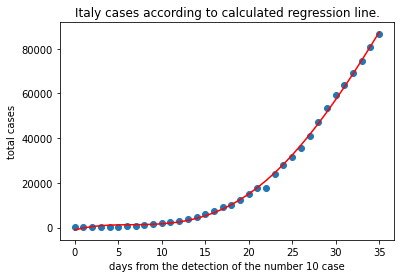

None


In [0]:
włochy.plot()

In [0]:
włochy.prediction(4)

112920.0

In [0]:
włochy.prediction(5)

119180.0

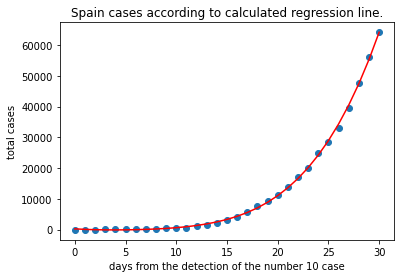

None


In [0]:
hiszpania.plot()

In [0]:
hiszpania.prediction(1)

74035.0

In [0]:
hiszpania.prediction(4)

110936.0

In [0]:
hiszpania.prediction(5)

125939.0